In [29]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import math

import warnings
warnings.filterwarnings('ignore')

In [129]:
def acquire_data():
    df = pd.read_csv('Traffic_Violations_montgomery_county.csv')
    return df
df = acquire_data()
df.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,fbc324ab-bc8d-4743-ba23-7f9f370005e1,08/11/2019,20:02:00,MCP,"2nd District, Bethesda","LEAVING UNATTENDED VEH. W/O STOPPING ENGINE, L...",CORDELL ST @ NORFOLK AVE.,38.989743,-77.097770,No,...,21-1101(a),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9897433333333, -77.09777)"
1,a6d904ec-d666-4bc3-8984-f37a4b31854d,08/12/2019,13:41:00,MCP,"2nd District, Bethesda",EXCEEDING POSTED MAXIMUM SPEED LIMIT: 85 MPH I...,NBI270 AT MIDDLEBROOK RD,39.174110,-77.246170,No,...,21-801.1,Transportation Article,False,WHITE,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.17411, -77.24617)"
2,54a64f6a-df28-4b65-a335-08883866aa46,08/12/2019,21:00:00,MCP,"5th District, Germantown",DRIVING VEH W/ TV-TYPE RECEIVING VIDEO EQUIP T...,MIDDLEBROOK AN 355,39.182015,-77.238221,No,...,21-1129,Transportation Article,False,BLACK,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.1820155, -77.2382213333333)"
3,cf5479b6-9bc7-4216-a7b2-99e57ae932af,08/12/2019,21:43:00,MCP,"5th District, Germantown",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GERMANTOWN RD AND ALE HOUSE,39.160508,-77.284023,No,...,13-401(h),Transportation Article,False,BLACK,M,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1605076666667, -77.284023)"
4,5601ca35-8ee7-4f8e-9208-d89cde96d469,08/12/2019,21:30:00,MCP,"2nd District, Bethesda",FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...,EASTWEST/ 355,38.984247,-77.090548,No,...,16-116(a),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9842466666667, -77.0905483333333)"


In [130]:
def clean_data(df):
    # drop columns
    drop_col = ['SeqID', 'Agency', 'Accident', 'Fatal', 'Commercial License','HAZMAT', 'Commercial Vehicle', 
                'Work Zone', 'State', 'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Charge', 'Article', 
                'Driver State', 'DL State', 'Search Reason For Stop', 'Search Arrest Reason', 'Location',
                'Search Conducted', 'Search Disposition', 'Search Outcome', 'Search Reason', 'Search Type',
                'Geolocation','Latitude', 'Longitude','Description', 'Driver City', 'Arrest Type']
    df = df.drop(columns = drop_col)
    
    # # convert time format
    df['date_time'] = df['Date Of Stop'] + ' ' + df['Time Of Stop']
    col = ['Date Of Stop', 'Time Of Stop']
    df = df.drop(columns = col)
    df['date_time'] = pd.to_datetime(df['date_time'])
    
    # set the time to index and create new columns for year, month, day of the week and hour
    df.set_index('date_time', inplace=True)
    df.sort_index(inplace=True)
    df['month'] = df.index.strftime('%m-%b')
    df['day_of_week'] = df.index.strftime('%A')
    df['year'] = df.index.strftime('%Y')
    df['hour'] = df.index.strftime('%H')
    
    # convert the boolean value into int
    df['Contributed To Accident'] = np.where(df['Contributed To Accident'] == True, 1, df['Contributed To Accident'])
    df['Contributed To Accident'] = np.where(df['Contributed To Accident'] == False, 0, df['Contributed To Accident'])

    # SubAgency S15 and W15 only have less than 10 rows.
    df = df[df.SubAgency != 'S15']
    df = df[df.SubAgency != 'W15']
    return df

In [131]:
df = clean_data(df)
df.head()

,SubAgency,Belts,Personal Injury,Property Damage,Alcohol,Violation Type,Contributed To Accident,Race,Gender,month,day_of_week,year,hour
date_time,,,,,,,,,,,,,
2012-01-01 00:43:00,Headquarters and Special Operations,No,No,No,No,Warning,0,WHITE,M,01-Jan,Sunday,2012,00
2012-01-01 00:52:00,"3rd District, Silver Spring",No,No,No,No,Citation,0,HISPANIC,F,01-Jan,Sunday,2012,00
2012-01-01 00:52:00,"3rd District, Silver Spring",No,No,No,No,Citation,0,HISPANIC,F,01-Jan,Sunday,2012,00
2012-01-01 00:52:00,"3rd District, Silver Spring",No,No,No,No,Citation,0,HISPANIC,F,01-Jan,Sunday,2012,00
2012-01-01 00:52:00,"3rd District, Silver Spring",No,No,No,No,Citation,0,HISPANIC,F,01-Jan,Sunday,2012,00


In [132]:
df = df[df['Contributed To Accident'] == 1]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48076 entries, 2012-01-01 01:30:00 to 2022-08-13 09:04:00
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   SubAgency                48076 non-null  object
 1   Belts                    48076 non-null  object
 2   Personal Injury          48076 non-null  object
 3   Property Damage          48076 non-null  object
 4   Alcohol                  48076 non-null  object
 5   Violation Type           48076 non-null  object
 6   Contributed To Accident  48076 non-null  int64 
 7   Race                     48076 non-null  object
 8   Gender                   48076 non-null  object
 9   month                    48076 non-null  object
 10  day_of_week              48076 non-null  object
 11  year                     48076 non-null  object
 12  hour                     48076 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.1+ MB


In [133]:
def split_data(df):
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)

    train, validate = train_test_split(train_validate, test_size=.3, 
                                       random_state=123)
    
    return train, validate, test

# , stratify=df['Personal Injury']

In [134]:
train, validate, test = split_data(df)
train.shape, validate.shape, test.shape

((26922, 13), (11538, 13), (9616, 13))

## Explore

1. does personal injury in accident related to time?

<AxesSubplot:xlabel='year', ylabel='Count'>

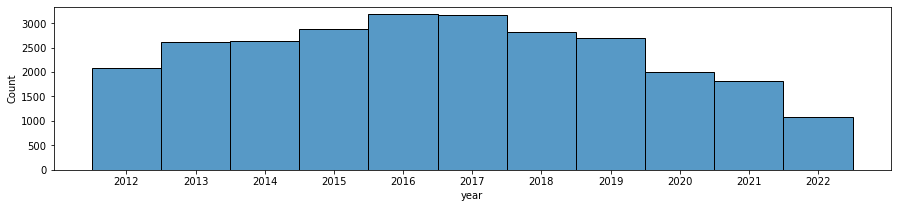

In [146]:
# plt.rcParams["figure.figsize"] = (10,4)
sns.histplot(train.year.sort_index(ascending=True))

<AxesSubplot:xlabel='hour', ylabel='Count'>

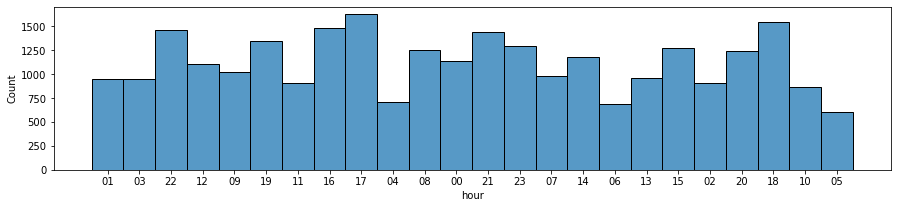

In [145]:
sns.histplot(train.hour.sort_index(ascending=True))

<AxesSubplot:xlabel='month', ylabel='Count'>

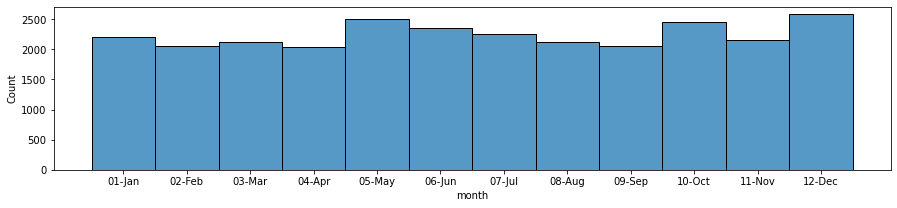

In [140]:
sns.histplot(train.month.sort_index(ascending=True))

In [147]:
hour = pd.crosstab(train.hour, train['Personal Injury'], normalize = 'index').sort_index(ascending=False)
day_of_week = pd.crosstab(train.day_of_week, train['Personal Injury'], normalize = 'index').sort_index(ascending=False)
month = pd.crosstab(train.month, train['Personal Injury'], normalize = 'index').sort_index(ascending=False)
year = pd.crosstab(train.year, train['Personal Injury'], normalize = 'index').sort_index(ascending=False)

<AxesSubplot:ylabel='year'>

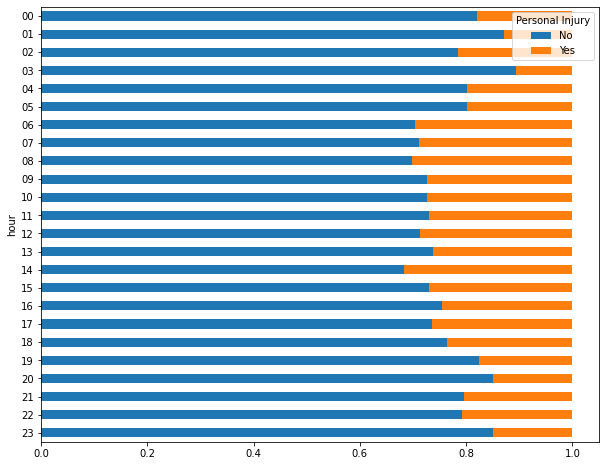

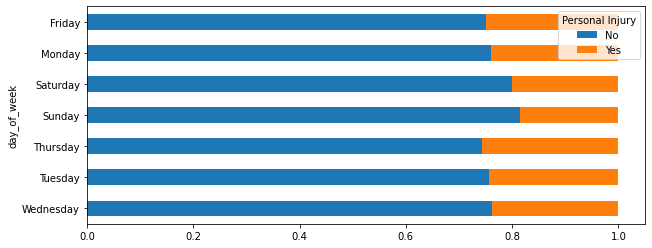

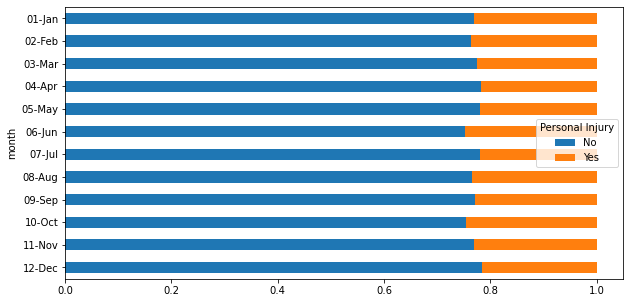

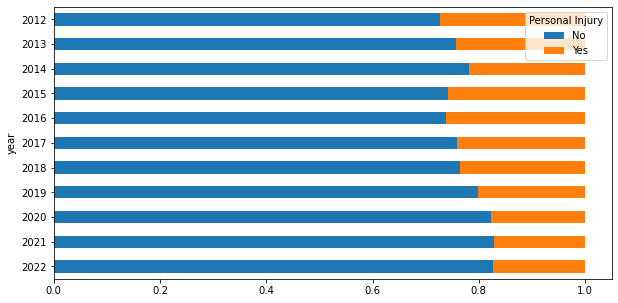

In [148]:
hour.plot.barh(stacked = True, figsize = (10, 8), fontsize = 10)
day_of_week.plot.barh(stacked = True, figsize = (10, 4), fontsize = 10)
month.plot.barh(stacked = True, figsize = (10, 5), fontsize = 10)
year.plot.barh(stacked = True, figsize = (10, 5), fontsize = 10)

2. Does Personal Injury relate to race and gender?

<AxesSubplot:xlabel='Gender', ylabel='Count'>

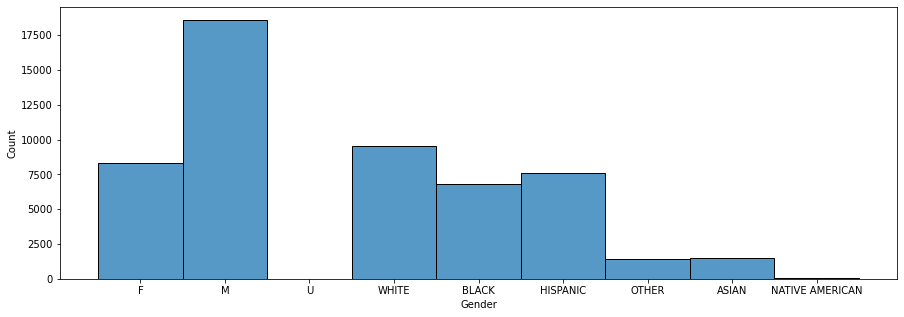

In [151]:
# plt.rcParams["figure.figsize"] = (15,5)
sns.histplot(train.Gender)
sns.histplot(train.Race)

<AxesSubplot:ylabel='Race'>

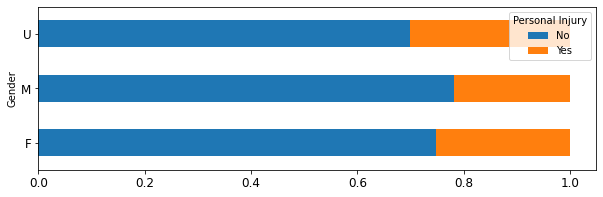

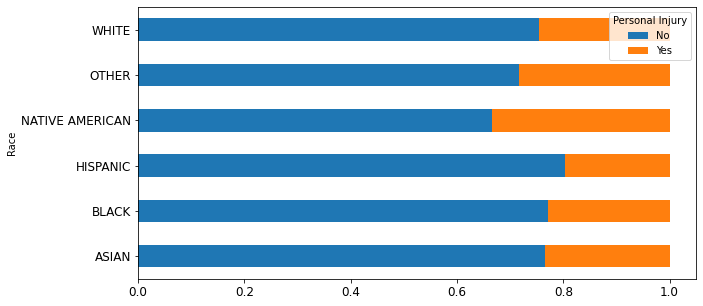

In [152]:
race = pd.crosstab(train.Race, train['Personal Injury'], normalize = 'index')
gender = pd.crosstab(train.Gender, train['Personal Injury'], normalize = 'index')

gender.plot.barh(stacked = True, figsize = (10, 3), fontsize = 12)
race.plot.barh(stacked = True, figsize = (10, 5), fontsize = 12)

3. What about the relationship between contributed to accident and Violation Type? achohol? belts?

<AxesSubplot:ylabel='Belts'>

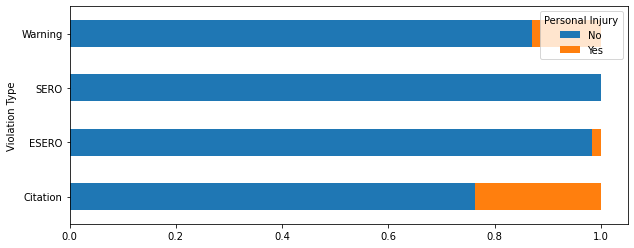

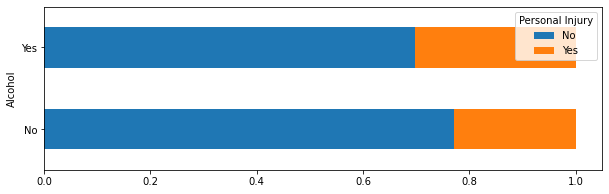

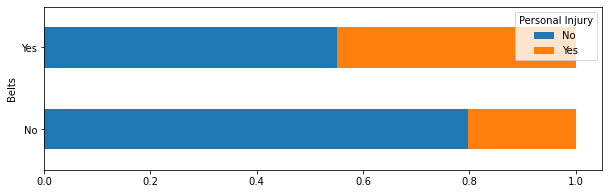

In [153]:
violation = pd.crosstab(train['Violation Type'], train['Personal Injury'], normalize = 'index')
alcohol = pd.crosstab(train.Alcohol, train['Personal Injury'], normalize = 'index')
belts = pd.crosstab(train.Belts, train['Personal Injury'], normalize = 'index')

violation.plot.barh(stacked = True, figsize = (10, 4), fontsize = 10)
alcohol.plot.barh(stacked = True, figsize = (10, 3), fontsize = 10)
belts.plot.barh(stacked = True, figsize = (10, 3), fontsize = 10)

4. Is contributed to accident has relationship with agency location?

<AxesSubplot:ylabel='SubAgency'>

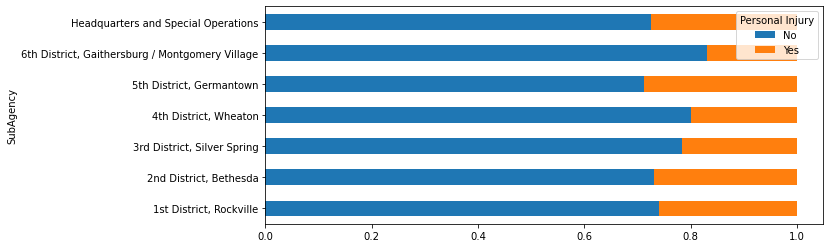

In [154]:
agency = pd.crosstab(train['SubAgency'], train['Personal Injury'], normalize = 'index')
agency.plot.barh(stacked = True, figsize = (10, 4), fontsize = 10)

5. Is property damage has relationship with personal injury?

<AxesSubplot:ylabel='Property Damage'>

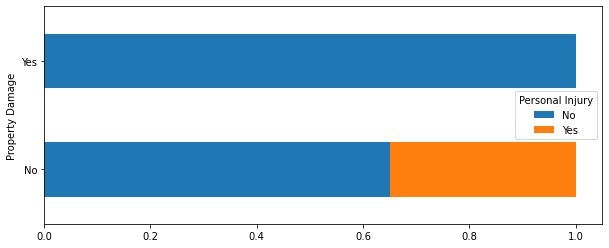

In [155]:
damage = pd.crosstab(train['Property Damage'], train['Personal Injury'], normalize = 'index')
damage.plot.barh(stacked = True, figsize = (10, 4), fontsize = 10)

## Features

In [156]:
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

x_train = train[['Alcohol', 'Race','day_of_week', 'hour','Gender','SubAgency','month']]
y_train = train[['Personal Injury']]

x_train_dummy_feature = pd.get_dummies(x_train)
y_train_dummy_feature = pd.get_dummies(y_train, drop_first=True)

In [157]:
kbest = SelectKBest(f_regression, k=10)
kbest.fit(x_train_dummy_feature, y_train_dummy_feature)
x_train_dummy_feature.columns[kbest.get_support()]

Index(['Race_HISPANIC', 'day_of_week_Sunday', 'hour_01', 'hour_03', 'hour_14',
       'hour_23', 'SubAgency_2nd District, Bethesda',
       'SubAgency_4th District, Wheaton', 'SubAgency_5th District, Germantown',
       'SubAgency_6th District, Gaithersburg / Montgomery Village'],
      dtype='object')

* race, weekday, hour, location

In [158]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(x_train_dummy_feature, y_train_dummy_feature)
x_train_dummy_feature.columns[rfe.get_support()]

Index(['month_01-Jan', 'month_02-Feb', 'month_03-Mar', 'month_04-Apr',
       'month_05-May', 'month_07-Jul', 'month_08-Aug', 'month_09-Sep',
       'month_11-Nov', 'month_12-Dec'],
      dtype='object')

* month

## Modeling

* race, weekday, hour, month, location

In [159]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [182]:
train['Personal Injury'].value_counts()

No     20757
Yes     6165
Name: Personal Injury, dtype: int64

In [188]:
train['baseline'] = 'No'
baseline_accuracy_train = (train['Personal Injury'] == train.baseline).mean()
print(f'baseline accuracy on train set: {baseline_accuracy_train:.2%}')

baseline accuracy on train set: 77.10%


In [183]:
validate['Personal Injury'].value_counts()

No     8945
Yes    2593
Name: Personal Injury, dtype: int64

In [189]:
validate['baseline'] = 'No'
baseline_accuracy_validate = (validate['Personal Injury'] == validate.baseline).mean()
print(f'baseline accuracy on validate set: {baseline_accuracy_validate:.2%}')

baseline accuracy on validate set: 77.53%


### 1. Decision Tree

In [164]:
x_train = train[['Race','day_of_week', 'hour','month','SubAgency']]
y_train = train[['Personal Injury']]
x_validate = validate[['Race','day_of_week', 'hour','month','SubAgency']]
y_validate = validate[['Personal Injury']]
x_test = test[['Race','day_of_week', 'hour','month','SubAgency']]
y_test = test[['Personal Injury']]

x_train = pd.get_dummies(x_train, drop_first=True)
y_train = pd.get_dummies(y_train, drop_first=True)
x_validate = pd.get_dummies(x_validate, drop_first=True)
y_validate = pd.get_dummies(y_validate, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)
y_test = pd.get_dummies(y_test, drop_first=True)

In [165]:
metrics = []
for i in range(1, 30):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(x_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(x_train, y_train)
    
    out_of_sample_accuracy = tree.score(x_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
tree_mc = pd.DataFrame(metrics)
tree_mc["difference"] = tree_mc.train_accuracy - tree_mc.validate_accuracy
tree_mc

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.771005,0.775264,-0.004259
1,2,0.771005,0.775264,-0.004259
2,3,0.771339,0.775351,-0.004012
3,4,0.772157,0.776304,-0.004148
4,5,0.772825,0.775958,-0.003133
5,6,0.774311,0.776131,-0.001820
6,7,0.777060,0.775178,0.001882
7,8,0.779251,0.777431,0.001820
8,9,0.782148,0.778471,0.003677
9,10,0.786606,0.777778,0.008828


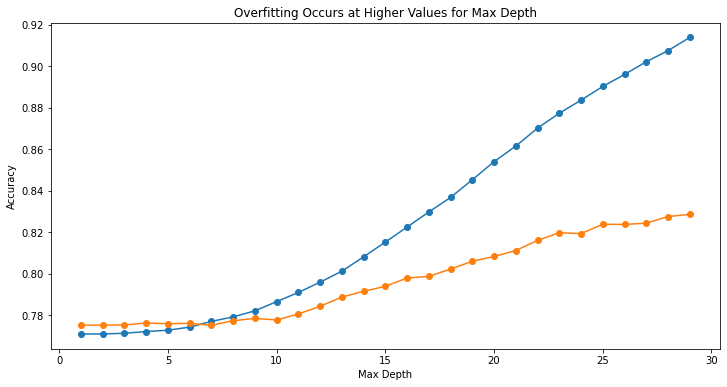

In [166]:
plt.figure(figsize=(12, 6))
plt.plot(tree_mc.max_depth, tree_mc.train_accuracy, marker = 'o')
plt.plot(tree_mc.max_depth, tree_mc.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

* max_depth = 14

In [167]:
# step 1: Creat your recipe
tree = DecisionTreeClassifier(max_depth = 14)

# Step 2: Fit your model to your in-sample data (train)
tree.fit(x_train, y_train)

predictions1 = tree.predict(x_train)

print(classification_report(y_train, predictions1))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     20757
           1       0.87      0.19      0.31      6165

    accuracy                           0.81     26922
   macro avg       0.84      0.59      0.60     26922
weighted avg       0.82      0.81      0.76     26922



In [168]:
print('Accuracy of decision tree1 (max_depth=14) classifier on train set: {:.2%}'
     .format(tree.score(x_train, y_train)))

Accuracy of decision tree1 (max_depth=14) classifier on train set: 80.83%


In [169]:
TN1, FP1, FN1, TP1 = confusion_matrix(y_train, predictions1).ravel()

ALL1 = TP1 + FP1 + FN1 + TN1

accuracy = (TP1 + TN1)/ALL1
true_positive_rate = sensitivity = recall = power = TP1/(TP1+FN1)
false_positive_rate = false_alarm_ratio = fallout = FP1/(FP1+TN1)
true_negative_rate = specificity = selectivity = TN1/(TN1+FP1)
false_negative_rate = miss_rate = FN1/(FN1+TP1)
precision = PPV = TP1/(TP1+FP1)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP1 + FN1
support_neg = FP1 + TN1

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.808260901864646 

True Positive Rate/Sensitivity/Recall/Power: 0.1922141119221411 

False Positive Rate/False Alarm Ratio/Fall-out: 0.008768126415185238 

True Negative Rate/Specificity/Selectivity: 0.9912318735848148 

False Negative Rate/Miss Rate: 0.8077858880778589 

Precision/PPV: 0.866861741038771 

F1 Score: 0.3146574614976102 

Support (0): 20757 

Support (1): 6165


### 2. Random forest

In [170]:
metrics = []
# .sample(10000, random_state=123)
for i in range(10,40):
    rf = RandomForestClassifier(max_depth=(i), 
                            min_samples_leaf=1,
                            random_state=123)
    
    rf = rf.fit(x_train, y_train)
    
    in_sample_accuracy = rf.score(x_train, y_train)
    
    out_of_sample_accuracy = rf.score(x_validate, y_validate)
    
    output = {"max_depth": (i),"min_sample_lead" :1,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy}
        
    metrics.append(output)
    
rf_mc = pd.DataFrame(metrics)
rf_mc["difference"] = rf_mc.train_accuracy - rf_mc.validate_accuracy
rf_mc

,max_depth,min_sample_lead,train_accuracy,validate_accuracy,difference
0,10,1,0.772565,0.776304,-0.003739
1,11,1,0.773457,0.777084,-0.003628
2,12,1,0.776242,0.778298,-0.002055
3,13,1,0.779437,0.780118,-0.000681
4,14,1,0.783931,0.782371,0.001560
5,15,1,0.790766,0.786791,0.003974
6,16,1,0.797749,0.789912,0.007837
7,17,1,0.810564,0.799445,0.011119
8,18,1,0.822079,0.805426,0.016653
9,19,1,0.833370,0.811319,0.022051


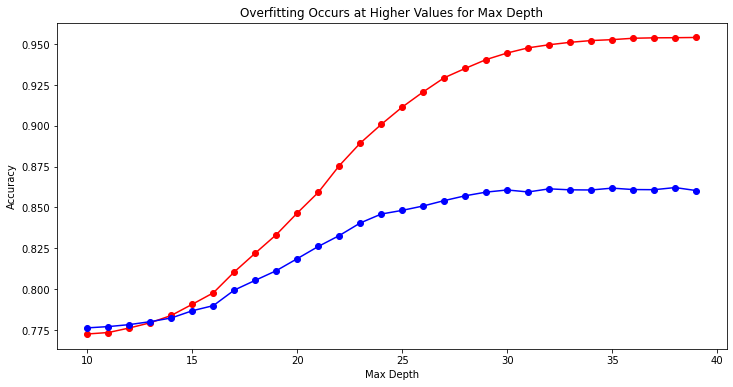

In [171]:
plt.figure(figsize=(12, 6))
plt.plot(rf_mc.max_depth, rf_mc.train_accuracy, color = 'r', marker = 'o')
plt.plot(rf_mc.max_depth, rf_mc.validate_accuracy, color = 'b', marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [172]:
rf = RandomForestClassifier(max_depth=19, 
                            min_samples_leaf=1,
                            random_state=123)
rf.fit(x_train, y_train)
predictions2 = rf.predict(x_train)

print(classification_report(y_train, predictions2))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     20757
           1       0.97      0.28      0.43      6165

    accuracy                           0.83     26922
   macro avg       0.90      0.64      0.67     26922
weighted avg       0.86      0.83      0.80     26922



In [173]:
print('Accuracy of random forest (max_depth=19) classifier on train set: {:.2%}'
     .format(rf.score(x_train, y_train)))

Accuracy of random forest (max_depth=19) classifier on train set: 83.34%


In [174]:
TN2, FP2, FN2, TP2 = confusion_matrix(y_train, predictions2).ravel()
ALL2 = TP2 + FP2 + FN2 + TN2

accuracy = (TP2 + TN2)/ALL2
true_positive_rate = sensitivity = recal2 = power = TP2/(TP2+FN2)
false_positive_rate = false_alarm_ratio = fallout = FP2/(FP2+TN2)
true_negative_rate = specificity = selectivity = TN2/(TN2+FP2)
false_negative_rate = miss_rate = FN2/(FN2+TP2)
precision = PPV = TP2/(TP2+FP2)
f1_score = 2*(precision*recal2)/(precision+recal2)
support_pos = TP2 + FN2
support_neg = FP2 + TN2

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.8333704776762499 

True Positive Rate/Sensitivity/Recall/Power: 0.2796431467964315 

False Positive Rate/False Alarm Ratio/Fall-out: 0.0021679433444139326 

True Negative Rate/Specificity/Selectivity: 0.997832056655586 

False Negative Rate/Miss Rate: 0.7203568532035686 

Precision/PPV: 0.9745618993781797 

F1 Score: 0.43458532896395263 

Support (0): 20757 

Support (1): 6165


### 3. Logistic Regression

In [175]:
y_train['Personal Injury_Yes'].value_counts()

0    20757
1     6165
Name: Personal Injury_Yes, dtype: int64

In [176]:
# Define the logistic regression model

logit = LogisticRegression(C=1, random_state=123)

#  fit the model on train data
logit.fit(x_train, y_train)

# now use the model to make predictions
predictions3 = logit.predict(x_train)

print(classification_report(y_train, predictions3))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     20757
           1       0.00      0.00      0.00      6165

    accuracy                           0.77     26922
   macro avg       0.39      0.50      0.44     26922
weighted avg       0.59      0.77      0.67     26922



In [177]:
print('Accuracy of Logistic Regression (c=1) on train set: {:.2%}'
     .format(logit.score(x_train, y_train)))

Accuracy of Logistic Regression (c=1) on train set: 77.09%


In [178]:
TN3, FP3, FN3, TP3 = confusion_matrix(y_train, predictions3).ravel()
ALL3 = TP3 + FP3 + FN3 + TN3

accuracy = (TP3 + TN3)/ALL3
true_positive_rate = sensitivity = recal3 = power = TP3/(TP3+FN3)
false_positive_rate = false_alarm_ratio = fallout = FP3/(FP3+TN3)
true_negative_rate = specificity = selectivity = TN3/(TN3+FP3)
false_negative_rate = miss_rate = FN3/(FN3+TP3)
precision = PPV = TP3/(TP3+FP3)
f1_score = 2*(precision*recal3)/(precision+recal3)
support_pos = TP3 + FN3
support_neg = FP3 + TN3

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.7709308372334893 

True Positive Rate/Sensitivity/Recall/Power: 0.0 

False Positive Rate/False Alarm Ratio/Fall-out: 9.635303752950812e-05 

True Negative Rate/Specificity/Selectivity: 0.9999036469624705 

False Negative Rate/Miss Rate: 1.0 

Precision/PPV: 0.0 

F1 Score: nan 

Support (0): 20757 

Support (1): 6165


In [190]:
print(f'baseline accuracy on train set: {baseline_accuracy_train:.2%}')
print('Accuracy of decision tree (max_depth=14) classifier on train set: {:.2%}'
     .format(tree.score(x_train, y_train)))
print('Accuracy of random forest (max_depth=19) classifier on train set: {:.2%}'
     .format(rf.score(x_train, y_train)))
print('Accuracy of Logistic Regression (c=1) on train set: {:.2%}'
     .format(logit.score(x_train, y_train)))

baseline accuracy on train set: 77.10%
Accuracy of decision tree (max_depth=14) classifier on train set: 80.83%
Accuracy of random forest (max_depth=19) classifier on train set: 83.34%
Accuracy of Logistic Regression (c=1) on train set: 77.09%


### Validate

In [191]:
# predict on validate
y_pred_tree_validate = tree.predict(x_validate)
y_pred_rf_validate = rf.predict(x_validate)
y_pred_logistic_validate = logit.predict(x_validate)

# evaluate on validate
print(f'baseline accuracy on validate set: {baseline_accuracy_validate:.2%}')
print('Accuracy of decision tree (max_depth = 17) classifier on validate set: {:.2%}'
     .format(tree.score(x_validate, y_validate)))
print('Accuracy of random forest (max_depth=16) classifier on validate set: {:.2%}'
     .format(rf.score(x_validate, y_validate)))
print('Accuracy of Logistic Regression (c=1) on validate set: {:.2%}'
     .format(logit.score(x_validate, y_validate)))

baseline accuracy on validate set: 77.53%
Accuracy of decision tree (max_depth = 17) classifier on validate set: 79.22%
Accuracy of random forest (max_depth=16) classifier on validate set: 81.13%
Accuracy of Logistic Regression (c=1) on validate set: 77.52%


### Test - Random Forest

In [192]:
# predict on test
y_pred_test = rf.predict(x_test)

# evaluate on test
print('Accuracy of decision tree (max_depth = 17) on test set: {:.2%}'
     .format(rf.score(x_test, y_test)))

Accuracy of decision tree (max_depth = 17) on test set: 81.07%


In [218]:
x_train_rf1 = train[['Race','day_of_week', 'hour','SubAgency']]
y_train_rf1 = train[['Personal Injury']]
x_validate_rf1 = validate[['Race','day_of_week', 'hour','SubAgency']]
y_validate_rf1 = validate[['Personal Injury']]
x_test_rf1 = test[['Race','day_of_week', 'hour','SubAgency']]
y_test_rf1 = test[['Personal Injury']]
# 'month','hour','day_of_week','SubAgency'

x_train_rf1 = pd.get_dummies(x_train_rf1, drop_first=True)
y_train_rf1 = pd.get_dummies(y_train_rf1, drop_first=True)
x_validate_rf1 = pd.get_dummies(x_validate_rf1, drop_first=True)
y_validate_rf1 = pd.get_dummies(y_validate_rf1, drop_first=True)
x_test_rf1 = pd.get_dummies(x_test_rf1, drop_first=True)
y_test_rf1 = pd.get_dummies(y_test_rf1, drop_first=True)

In [219]:
metrics = []
# .sample(10000, random_state=123)
for i in range(1,40):
    rf = RandomForestClassifier(max_depth=(i), 
                            min_samples_leaf=1,
                            random_state=123)
    
    rf = rf.fit(x_train_rf1, y_train_rf1)
    
    in_sample_accuracy = rf.score(x_train_rf1, y_train_rf1)
    
    out_of_sample_accuracy = rf.score(x_validate_rf1, y_validate_rf1)
    
    output = {"max_depth": (i),"min_sample_lead" :1,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy}
        
    metrics.append(output)
    
rf1_mc = pd.DataFrame(metrics)
rf1_mc["difference"] = rf1_mc.train_accuracy - rf1_mc.validate_accuracy
rf1_mc

,max_depth,min_sample_lead,train_accuracy,validate_accuracy,difference
0,1,1,0.771005,0.775264,-0.004259
1,2,1,0.771005,0.775264,-0.004259
2,3,1,0.771005,0.775264,-0.004259
3,4,1,0.771005,0.775264,-0.004259
4,5,1,0.771005,0.775264,-0.004259
5,6,1,0.771005,0.775264,-0.004259
6,7,1,0.771005,0.775264,-0.004259
7,8,1,0.771228,0.775524,-0.004296
8,9,1,0.771228,0.775524,-0.004296
9,10,1,0.772268,0.775611,-0.003343


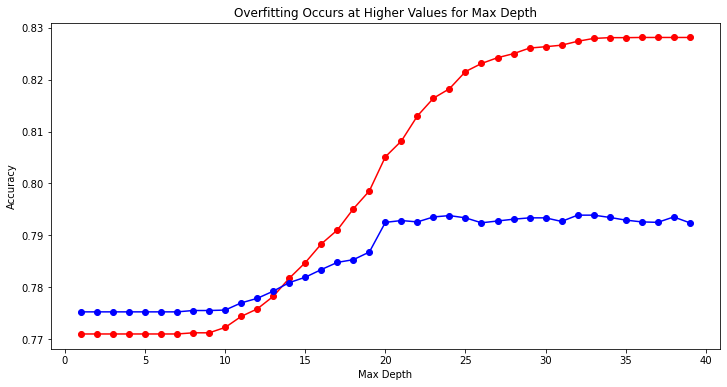

In [220]:
plt.figure(figsize=(12, 6))
plt.plot(rf1_mc.max_depth, rf1_mc.train_accuracy, color = 'r', marker = 'o')
plt.plot(rf1_mc.max_depth, rf1_mc.validate_accuracy, color = 'b', marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

* max = 20

In [221]:
rf1 = RandomForestClassifier(max_depth=20, 
                            min_samples_leaf=1,
                            random_state=123)
rf1.fit(x_train_rf1, y_train_rf1)
predictions_rf1 = rf1.predict(x_train_rf1)

print(classification_report(y_train_rf1, predictions_rf1))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     20757
           1       0.82      0.19      0.31      6165

    accuracy                           0.81     26922
   macro avg       0.81      0.59      0.60     26922
weighted avg       0.81      0.81      0.75     26922



In [222]:
print('Accuracy of random forest (max_depth=18) classifier on train set: {:.2%}'
     .format(rf1.score(x_train_rf1, y_train_rf1)))

Accuracy of random forest (max_depth=18) classifier on train set: 80.51%


In [223]:
print('Accuracy of random forest (max_depth=18) classifier on validate set: {:.2%}'
     .format(rf1.score(x_validate_rf1, y_validate_rf1)))

Accuracy of random forest (max_depth=18) classifier on validate set: 79.25%


In [224]:
TN4, FP4, FN4, TP4 = confusion_matrix(y_train_rf1, predictions_rf1).ravel()
ALL4 = TP4 + FP4 + FN4 + TN4

accuracy = (TP4 + TN4)/ALL4
true_positive_rate = sensitivity = recal4 = power = TP4/(TP4+FN4)
false_positive_rate = false_alarm_ratio = fallout = FP4/(FP4+TN4)
true_negative_rate = specificity = selectivity = TN4/(TN4+FP4)
false_negative_rate = miss_rate = FN4/(FN4+TP4)
precision = PPV = TP4/(TP4+FP4)
f1_score = 2*(precision*recal4)/(precision+recal4)
support_pos = TP4 + FN4
support_neg = FP4 + TN4

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.8051407770596538 

True Positive Rate/Sensitivity/Recall/Power: 0.19140308191403083 

False Positive Rate/False Alarm Ratio/Fall-out: 0.012574071397600809 

True Negative Rate/Specificity/Selectivity: 0.9874259286023992 

False Negative Rate/Miss Rate: 0.8085969180859692 

Precision/PPV: 0.8188757807078417 

F1 Score: 0.31028135682356034 

Support (0): 20757 

Support (1): 6165
